In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


2024-04-09 00:16:14.061793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 00:16:14.061917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 00:16:14.240559: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [4]:
train_data = np.array(train , dtype = 'float32')
test_data = np.array(test , dtype = 'float32')

In [5]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

Label For The Image is: V


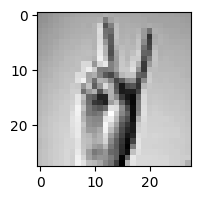

In [6]:
i = random.randint(1, train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2, 2))
plt.imshow(train_data[i, 1:].reshape((28, 28)), cmap='gray')
print("Label For The Image is:", class_names[int(train_data[i, 0])])

Text(0.5, 1.0, 'label')

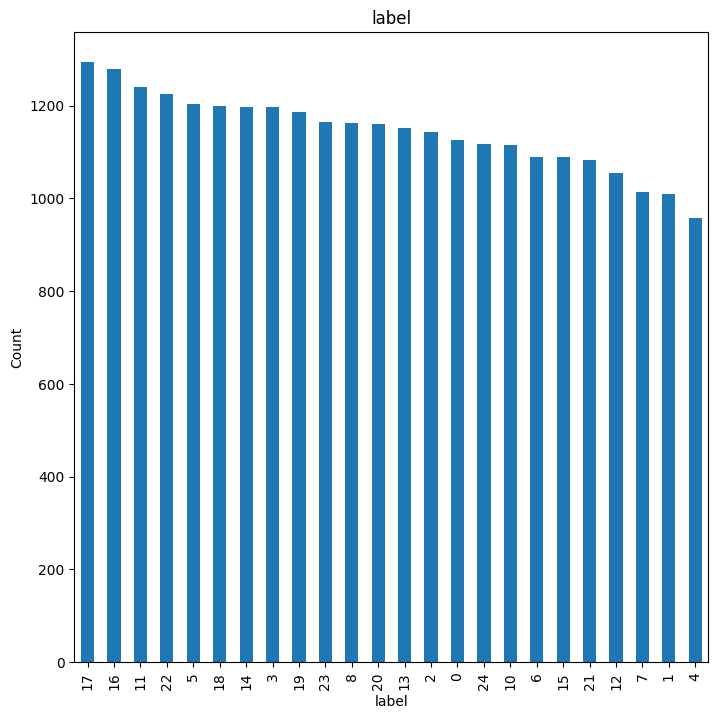

In [7]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('label')

In [8]:
X_train = train_data[:,1:]/255.
X_test = test_data[:,1:]/255.

In [9]:
y_train = train_data[:,0]
y_train_category = to_categorical(y_train, num_classes=25)

In [10]:
y_test = test_data[:,0]
y_test_category = to_categorical(y_test, num_classes=25)

In [11]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(3,3),input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.compile(loss= 'categorical_crossentropy',optimizer='adam', metrics = ['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,409 (439.10 KB)

 Trainable params: 112,409 (439.10 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train , y_train_category , batch_size = 128 , epochs = 10 ,verbose =1,validation_data =(X_test ,y_test_category))

Epoch 1/10
 32/215 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.0435 - loss: 3.2102

I0000 00:00:1712621802.218144      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - acc: 0.1148 - loss: 2.9511 - val_acc: 0.5958 - val_loss: 1.2498
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6102 - loss: 1.1515 - val_acc: 0.7464 - val_loss: 0.7355
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.7725 - loss: 0.6790 - val_acc: 0.8155 - val_loss: 0.5238
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8443 - loss: 0.4617 - val_acc: 0.8550 - val_loss: 0.4016
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8865 - loss: 0.3351 - val_acc: 0.8904 - val_loss: 0.3021
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9156 - loss: 0.2492 - val_acc: 0.8988 - val_loss: 0.2718
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9382 - loss: 0.1841 - val_acc: 0.9141 - val_loss: 0.2525
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9545 - loss: 0.1479 - val_acc: 0.9180 - val_loss: 0.2246
Epoch 9/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9656

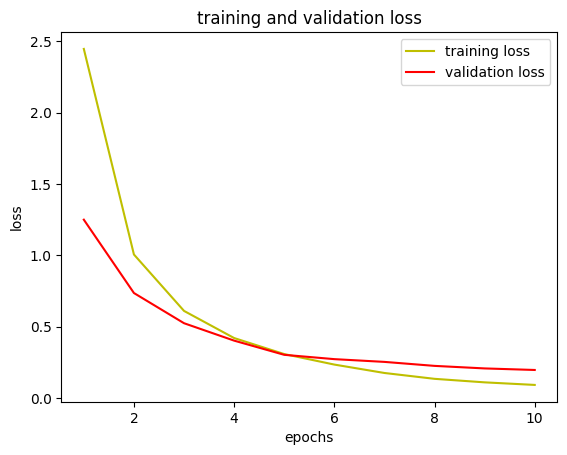

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r',label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

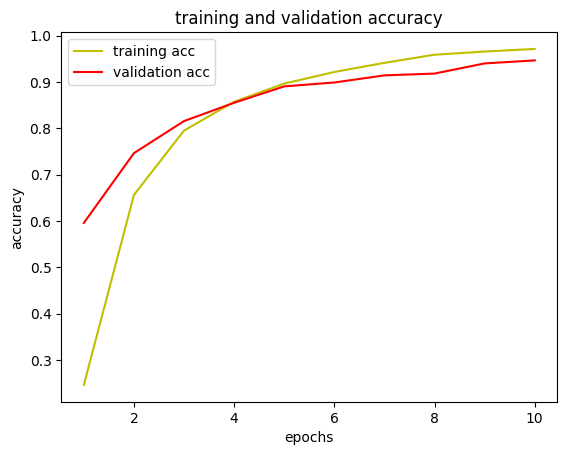

In [18]:
plt.plot(epochs,acc,'y',label='training acc')
plt.plot(epochs,val_acc,'r',label='validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [19]:
# Make predictions
predictions = model.predict(X_test)

# Convert raw predictions to predicted classes
predicted_classes = np.argmax(predictions, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy = accuracy_score(y_test, predicted_classes)
print('accuracy score =',accuracy)

accuracy score = 0.9464584495259342


predicted label :  C
true label :  C


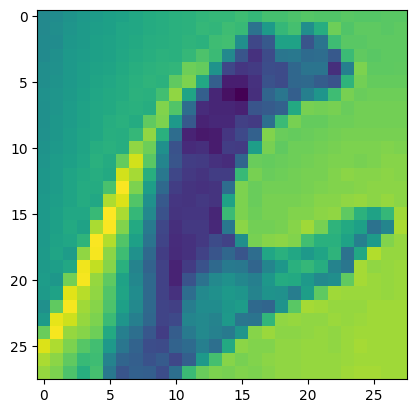

In [22]:
i = random.randint(1,len(predicted_classes))
plt.imshow(X_test[i,:,:,0])
print("predicted label : ",class_names[int(predicted_classes[i])])
print("true label : ", class_names[int(y_test[i])])